In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.rc('legend',fontsize=20) 
plt.rc('legend',fontsize='medium')
sns.set()

In [2]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf = datadf[datadf['is_personal']==1] # only personal entries
drop_cols = ['text','date_modified','address','mood','favourite','weather','photos','tags','lat','lon','timezone']
datadf = datadf.drop(columns = drop_cols)


In [3]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
timedata = timedata.set_index(timedata.columns[0])
timedata = timedata.loc[datadf.index.values]
# timedata.head(

In [4]:
datadf['no_punc'] = datadf['no_punc'].str.lower()
datadf['hits'] = 0
datadf

,date_journal,no_punc,is_personal,hits
id,,,,
1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,the first thing i saw when i entered her room ...,1,0
1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,philosophy it surprises mehw u so effortlessly...,1,0
1448901590730-3fb1dc9cd7759f38,2015-11-30 10:39:50,the brain that k have is way better than every...,1,0
1455822916041-3fe960e8002a1ada,2016-02-18 13:15:16,topaz its an authentic pale yellow unclear pol...,1,0
1530095593881-3fd85ff22150be2e,2016-02-27 12:30:00,finished reading the book all the light we can...,1,0
...,...,...,...,...
1589599203833-3fccc2487ff20d88,2020-05-15 22:20:04,that i really work well with introverts and pr...,1,0
1589599469199-3fc8b4cdb6d4b0d4,2020-05-15 22:24:29,jodi thor dak shoone ko na ashi tobe ekla chol...,1,0
1589603430128-3fdcc9774f183676,2020-05-15 23:30:30,its really been a while since ive told a girl ...,1,0


In [1]:
words = ['enke','nidhi','kelkar','aesthetic','sunflower','sunflowers', 'sourav', 'patwardhan']

In [2]:
def found (text, words):
    hits = 0
    for word in words:
        if word in str(text):
            hits = hits+1
    return(hits)

In [3]:
datadf['hits'] = datadf['no_punc'].apply(lambda x: found(x,words))

NameError: name 'datadf' is not defined

In [4]:
datadf['found'] = (datadf['hits']>0).astype(int)

NameError: name 'datadf' is not defined

In [5]:
# datadf[datadf['found']==1]

In [6]:
datadf = datadf.merge(timedata, on='id', how='inner')[['no_punc','day_num','month_num','year_month','minute_of_day','found','hour']]

NameError: name 'datadf' is not defined

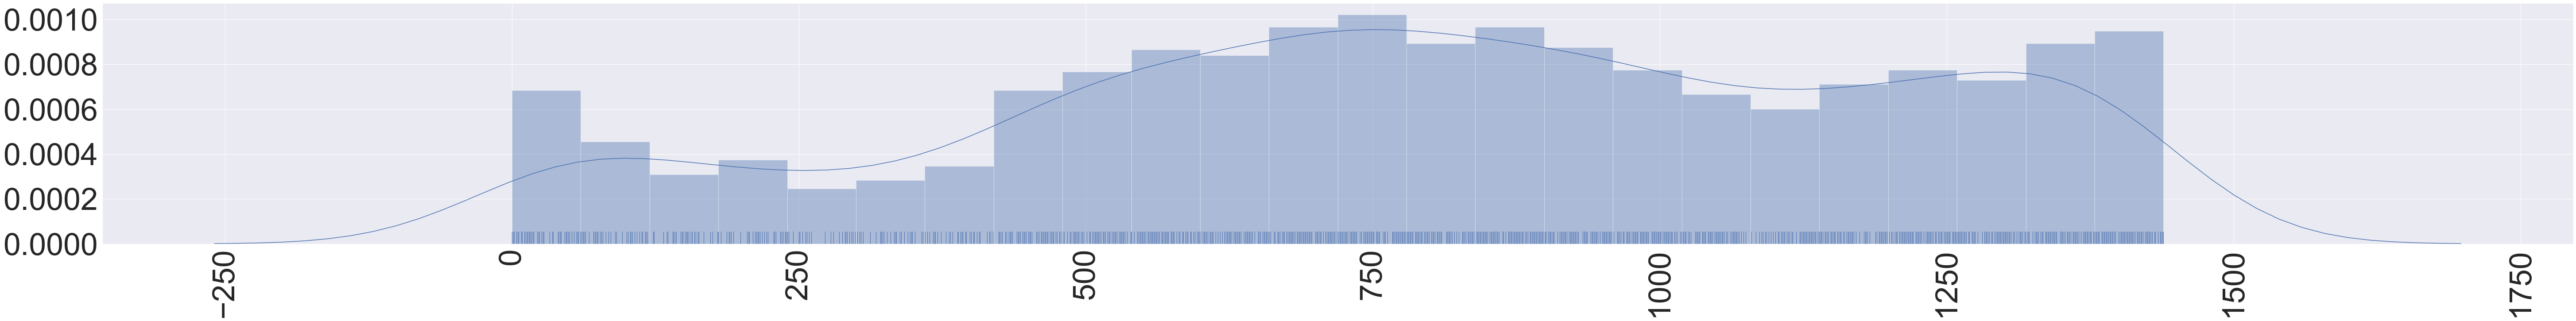

In [11]:
plt.figure(figsize=(100,10))
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70)
# plt.locator_params(axis='x', nbins=20)
# plt.title(label='Proportion of entries in a month where the words were mentioned', fontsize=100)
sns.distplot(datadf['minute_of_day'].values, rug=True, bins=24)

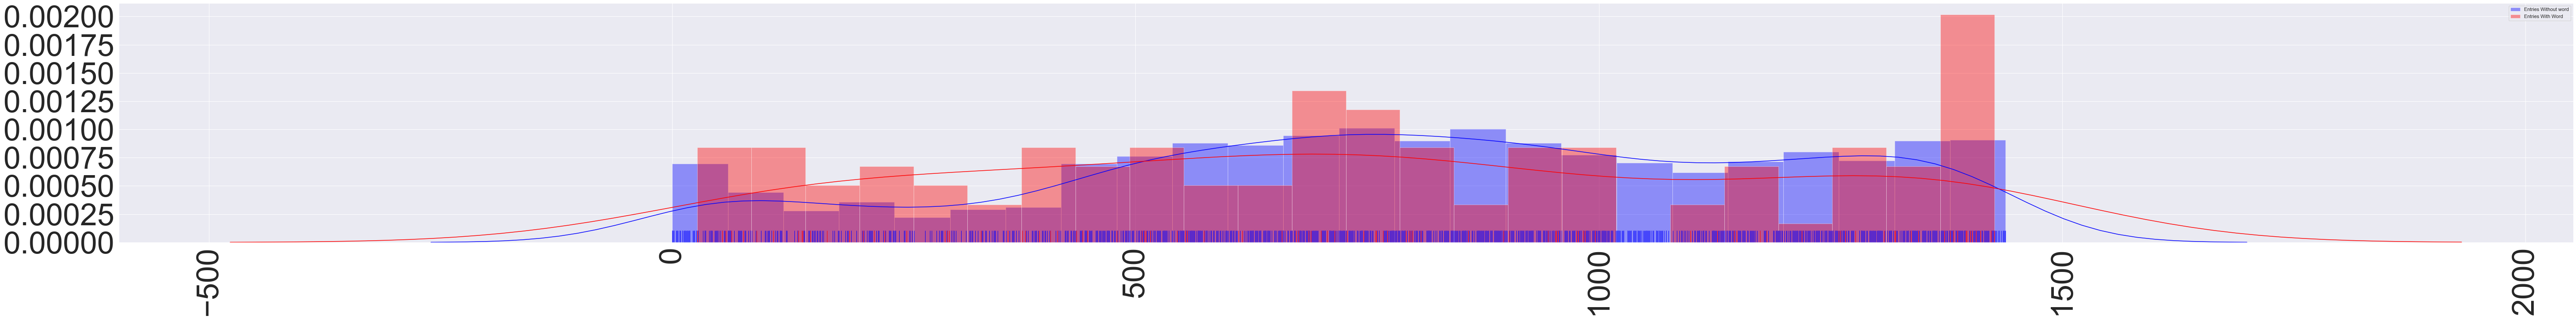

In [12]:
plt.figure(figsize=(100,10))
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70)
sns.distplot(datadf[datadf['found']==0]['minute_of_day'].values, rug=True, bins=24, color='blue', label='Entries Without word')
sns.distplot( datadf[datadf['found']==1]['minute_of_day'].values, color="red", label="Entries With Word",rug=True, bins=24)
plt.legend()

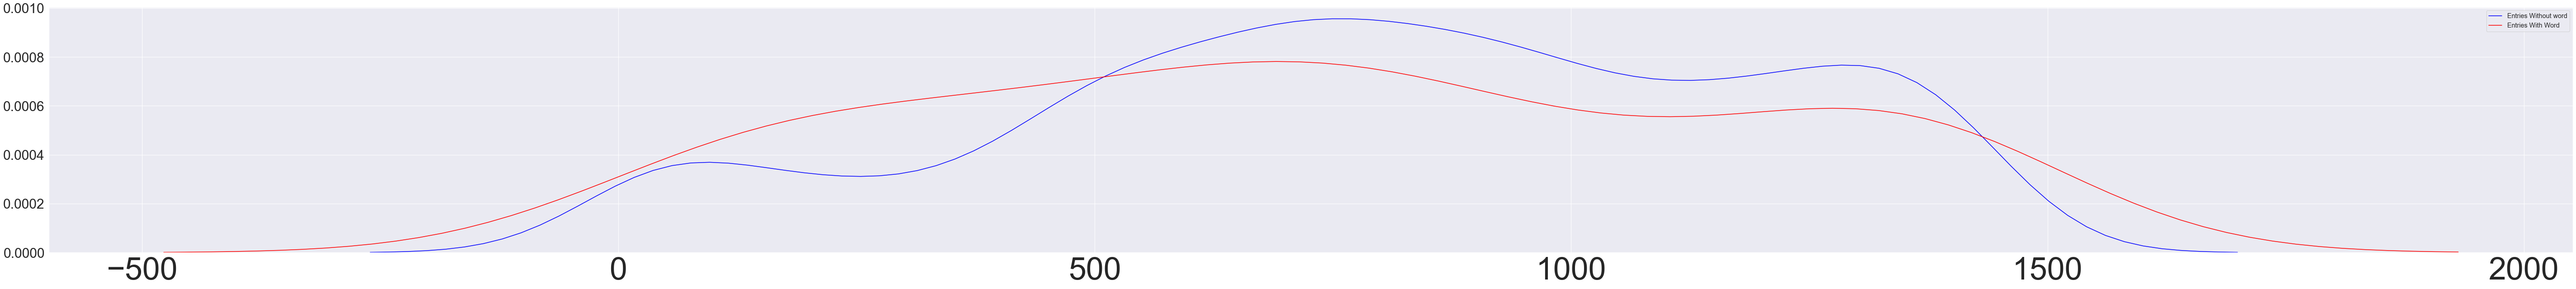

In [13]:
plt.figure(figsize=(100,10))
plt.xticks(fontsize=70, rotation=0)
plt.yticks(fontsize=30)
sns.distplot(datadf[datadf['found']==0]['minute_of_day'].values, bins=100, color='blue', label='Entries Without word',hist=False)
sns.distplot( datadf[datadf['found']==1]['minute_of_day'].values, color="red", label="Entries With Word", bins=100,hist=False)
plt.legend(fontsize='x-large', title_fontsize='70')

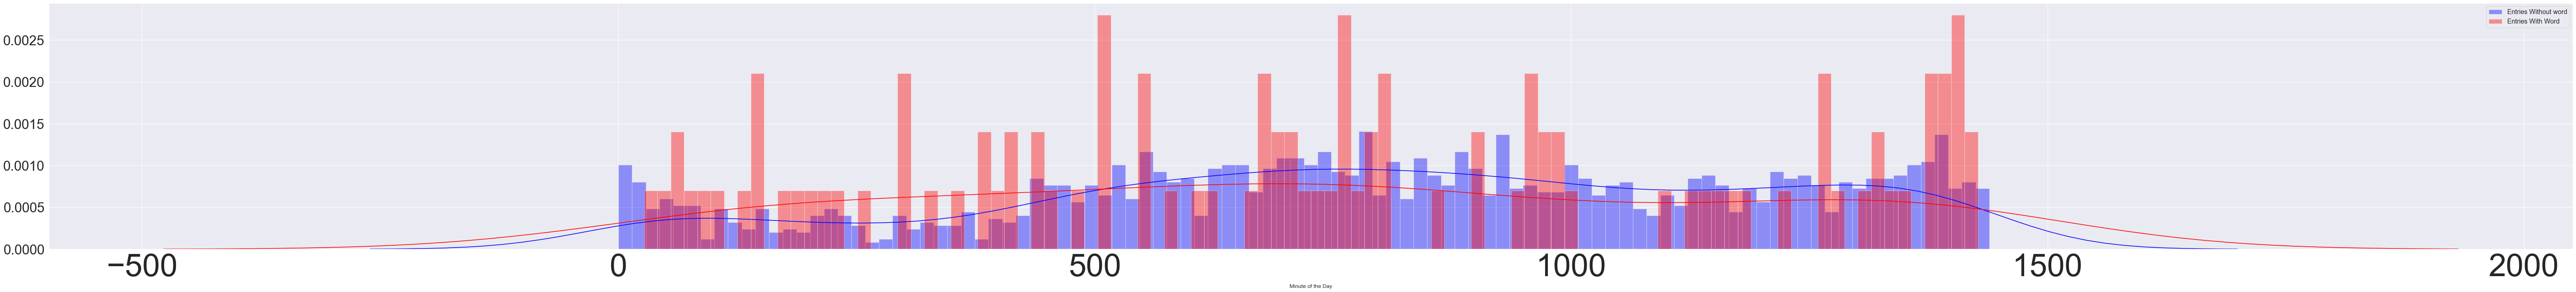

In [14]:
plt.figure(figsize=(100,10))
plt.xticks(fontsize=70, rotation=0)
plt.yticks(fontsize=30)
plt.xlabel('Minute of the Day')
sns.distplot(datadf[datadf['found']==0]['minute_of_day'].values, bins=100, color='blue', label='Entries Without word')
sns.distplot( datadf[datadf['found']==1]['minute_of_day'].values, color="red", label="Entries With Word", bins=100)
plt.legend(fontsize='x-large', title_fontsize='70')

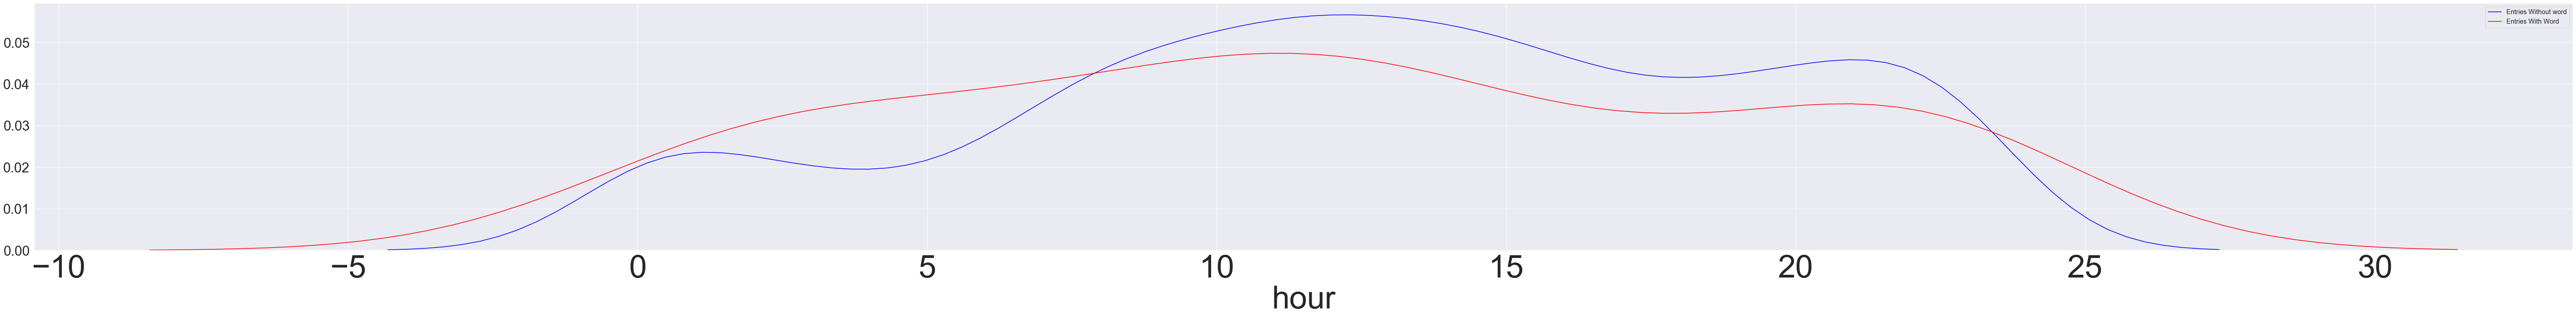

In [17]:
plt.figure(figsize=(100,10))
plt.xticks(fontsize=70, rotation=0)
plt.yticks(fontsize=30)
plt.xlabel('Hour of the Day', fontsize=70)
sns.distplot(datadf['hour'], color='blue', label='Entries Without word',hist=False)
sns.distplot( datadf[datadf['found']==1]['hour'].values, color="red", label="Entries With Word",hist=False)
plt.legend(fontsize='x-large', title_fontsize='70')

In [16]:
# how can I tell if the time of entries is significantly different?